/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

최적 하이퍼 파라미터:
 {'criterion': 'gini', 'max_depth': 6, 'max_features': 15, 'max_leaf_nodes': 19, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 798}
랜덤 포레스트 train 정확도: 0.9930
[[40  0  0  0]
 [ 0 43  0  0]
 [ 1  0 32  0]
 [ 0  0  0 27]]
랜덤 포레스트 test 정확도: 0.8889
[[ 8  0  1  0]
 [ 0  6  0  0]
 [ 3  0  6  0]
 [ 0  0  0 12]]
랜덤 포레스트 전체 정확도: 0.9721
[[48  0  1  0]
 [ 0 49  0  0]
 [ 4  0 38  0]
 [ 0  0  0 39]]
랜덤 포레스트 외부 정확도: 1.0000
[[53  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


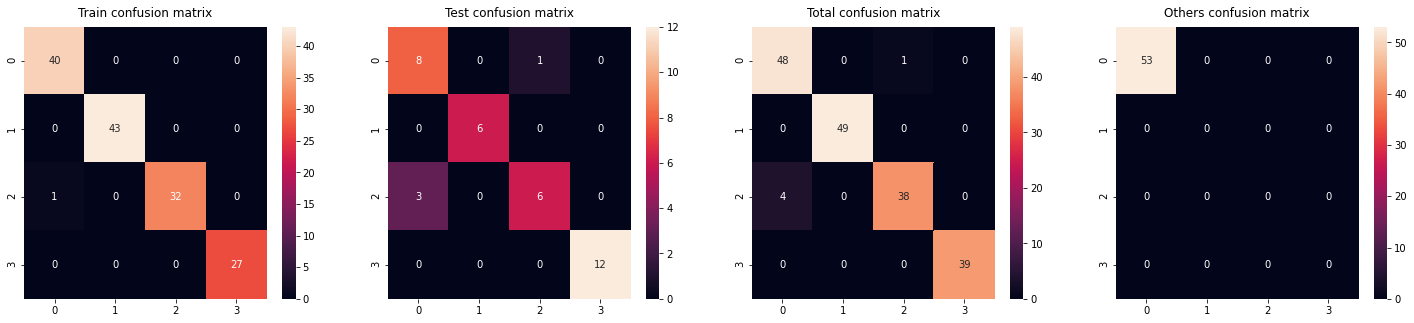

In [4]:
#모델 돌리기

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import randint, uniform
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN

# fix random seed for reproducibility

seed = 0
np.random.seed(seed)

# load dataset

df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2_MORDRED(3D)_apppendscore_dropsmiles.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2add_MORDRED(3D)_apppendscore_dropsmiles.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Others_MORDRED(3D)_appendscore_dropsmiles.csv')
df3 = pd.concat([df,df1,df2])
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Drug_MORDRED(3D)_appendscore_dropsmiles.csv')

#데이터 분류
#dataset = df.values
#X = dataset[:,:-1]
#Y = dataset[:,-1]

#dataset2 = df2.values
#X_ex = dataset2[:,:-1]
#Y_ex = dataset2[:,-1]

dataset3 = df3.values
X = dataset3[:,:-1]
Y = dataset3[:,-1]

data = data.values
X_others =data[:,:-1]
Y_others =data[:,-1]

#복합샘플링

randomover = RandomOverSampler(random_state=seed)
X_re, Y_re = randomover.fit_resample(X, Y)

#ada = ADASYN(random_state=seed)
#X_re1, Y_re1 = ada.fit_resample(X_re, Y_re)

#smote = SMOTE(random_state=seed)
#X_re2, Y_re2 = smote.fit_resample(X_re1, Y_re1)

smoteenn = SMOTEENN(enn=EditedNearestNeighbours(n_neighbors=2), random_state=seed)
X_re, Y_re = smoteenn.fit_resample(X_re, Y_re)

#데이터 표준화

Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_re)
X_others_scaled = Scaler.transform(X_others)

#데이터 split

train_input, test_input, train_target, test_target = train_test_split(X_scaled, Y_re, test_size=0.2, random_state=seed)

# 모델 생성 및 튜닝

params ={'n_estimators' : randint(10, 1000), "max_depth":randint(2,10) ,'max_features': randint(2,100),
              "min_samples_split": randint(2,10), 'criterion': ['gini', 'entropy'], 
              "min_samples_leaf": randint(1,5), "max_leaf_nodes": randint(1,100)}
rf = RandomForestClassifier(random_state=seed)
grid_cv = RandomizedSearchCV(rf, params, n_iter = 500, cv=5, n_jobs=-1)
grid_cv.fit(train_input,train_target)

print("최적 하이퍼 파라미터:\n", grid_cv.best_params_)

rb = grid_cv.best_estimator_

#정확도와 혼동함수 생성
pred = rb.predict(train_input)
accuracy = accuracy_score(train_target, pred)
print('랜덤 포레스트 train 정확도: {0:.4f}'.format(accuracy))
conf_matrix = confusion_matrix(train_target, pred, labels=[0,1,2,3])
print(conf_matrix)

pred2 = rb.predict(test_input)
accuracy = accuracy_score(test_target, pred2)
print('랜덤 포레스트 test 정확도: {0:.4f}'.format(accuracy))
conf_matrix2 = confusion_matrix(test_target, pred2, labels=[0,1,2,3])
print(conf_matrix2)

pred3 = rb.predict(X_scaled)
accuracy = accuracy_score(Y_re, pred3)
print('랜덤 포레스트 전체 정확도: {0:.4f}'.format(accuracy))
conf_matrix3 = confusion_matrix(Y_re, pred3, labels=[0,1,2,3])
print(conf_matrix3)

pred4 = rb.predict(X_others_scaled)
accuracy = accuracy_score(Y_others, pred4)
print('랜덤 포레스트 외부 정확도: {0:.4f}'.format(accuracy))
conf_matrix4 = confusion_matrix(Y_others, pred4, labels=[0,1,2,3])
print(conf_matrix4)

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(25, 5))
sns.heatmap(conf_matrix, annot=True, ax=ax[0])
ax[0].set_title('Train confusion matrix', pad = 10)
sns.heatmap(conf_matrix2, annot=True, ax=ax[1])
ax[1].set_title('Test confusion matrix', pad = 10)
sns.heatmap(conf_matrix3, annot=True, ax=ax[2])
ax[2].set_title('Total confusion matrix', pad = 10)
sns.heatmap(conf_matrix4, annot=True, ax=ax[3])
ax[3].set_title('Others confusion matrix', pad = 10)

#모델 저장
saved_model_rf = joblib.dump(rb,'/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2_RandomForest0430.pkl') 

#0319 tot 0.7188 0319_2 tot 0.78(test 0.5) 0319_3 total 0.8125(test 0.5) 0319_4 test 0.67 total 0.6875

#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측성능 평가
#rf_clf = RandomForestClassifier(n_estimators=30, max_depth=9, min_samples_leaf=1, min_samples_split=3, 
#                                max_features=7, max_leaf_nodes=3, criterion=['gini'], random_state=4)
#rf_clf.fit(X_train, Y_train)
#pred = rf_clf.predict(X_test)
#accuracy = accuracy_score(Y_test, pred)
#print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))
#{'random_state': 2, 'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 2, 'max_features': 4, 'max_depth': 9, 'criterion': 'gini'}

#importance = rf_clf.feature_importances_

# summarize feature importance

#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
       
# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.axis([0, 10, 0, 0.4])
#plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import randint, uniform
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN

# fix random seed for reproducibility

seed = 0
np.random.seed(seed)

# load dataset

df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2_MORDRED(3D)_apppendscore_dropsmiles.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2add_MORDRED(3D)_apppendscore_dropsmiles.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Others_MORDRED(3D)_appendscore_dropsmiles.csv')
df3 = pd.concat([df,df1,df2])
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Drug_MORDRED(3D)_appendscore_dropsmiles.csv')

#데이터 분류
#dataset = df.values
#X = dataset[:,:-1]
#Y = dataset[:,-1]

#dataset2 = df2.values
#X_ex = dataset2[:,:-1]
#Y_ex = dataset2[:,-1]

dataset3 = df3.values
X = dataset3[:,:-1]
Y = dataset3[:,-1]

data = data.values
X_others =data[:,:-1]
Y_others =data[:,-1]

#복합샘플링

randomover = RandomOverSampler(random_state=seed)
X_re, Y_re = randomover.fit_resample(X, Y)

#ada = ADASYN(random_state=seed)
#X_re1, Y_re1 = ada.fit_resample(X_re, Y_re)

#smote = SMOTE(random_state=seed)
#X_re2, Y_re2 = smote.fit_resample(X_re1, Y_re1)

smoteenn = SMOTEENN(enn=EditedNearestNeighbours(n_neighbors=2), random_state=seed)
X_re, Y_re = smoteenn.fit_resample(X_re, Y_re)

#데이터 표준화

Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_re)
X_others_scaled = Scaler.transform(X_others)

#데이터 split

train_input, test_input, train_target, test_target = train_test_split(X_scaled, Y_re, test_size=0.2, random_state=seed)

C:\Users\eunwoo\.conda\envs\Tensorflow\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


KeyboardInterrupt: 